Zad 1.
Wygeneruj dane 2d oraz 3d w kształcie prostokąta (odpowiednio sześcianu) . Wykonaj PCA i narysuj wszystkie komponenty.           
Zad 2.
Dla danych z powyższego zadania wybierz jedną (lub dwie dla danych 3d) i narysuj dane po redukcji wymiarowości 

Just rectangle


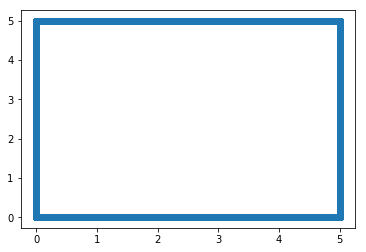



 PCA rectangle 2d


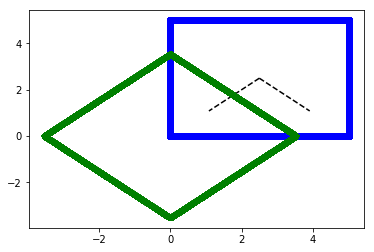

1D data shape:  (1, 40000)


 PCA rectangle 1d


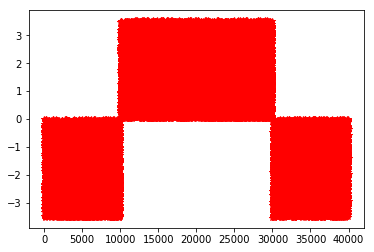

Components  [[-0.70710678  0.70710678]]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
import matplotlib.mlab as pca
import random 
import math
import itertools
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import jaccard_similarity_score

numb = 10000
d = 5
#rect1
x0 = (np.random.uniform(-d, d, numb))
y0 = abs(d/2 - abs(x0)) 
x0 = abs(x0)
y1 = -(abs(d/2 - abs(x0))-d)
X = np.append(x0, x0)
Y = np.append(y0, y1)
#rect2
y0 = [0] * numb
y1 = [d] * numb
X = np.append(x0, y0)
X = np.append(X, x0)
X = np.append(X, y1)
Y = np.append(y0, x0)
Y = np.append(Y, y1)
Y = np.append(Y, x0)
print("Just rectangle")
plt.scatter(X, Y)
plt.show()

matrix = np.concatenate([[X], [Y]])

def princomp(A):
 # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-np.mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = np.linalg.eig(np.cov(M)) # attention:not always sorted
    score = np.dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

coeff, score, latent = princomp(matrix.T)
#print("Coeff: \n", coeff)
#print("Score: \n", score)
#print("Latent: \n", latent)


print("\n\n PCA rectangle 2d")
# every eigenvector describe the direction of a principal component.
m = np.mean(matrix,axis=1)
plt.plot([0, -coeff[0,0]*2]+m[0], [0, -coeff[0,1]*2]+m[1],'--k')
plt.plot([0, coeff[1,0]*2]+m[0], [0, coeff[1,1]*2]+m[1],'--k')
plt.plot(matrix[0,:],matrix[1,:],'ob')

# new data
plt.plot(score[0,:],score[1,:],'*g')
plt.show()
# reduce
sklearn_pca = sklearnPCA(n_components=1)
sklearn_transf = sklearn_pca.fit_transform(matrix.T)

sklearn_transf = sklearn_transf.T
print("1D data shape: ",sklearn_transf.shape)
print("\n\n PCA rectangle 1d")
plt.plot(sklearn_transf[0,:],'*r')
plt.show()

print("Components ",sklearn_pca.components_)

Just cube


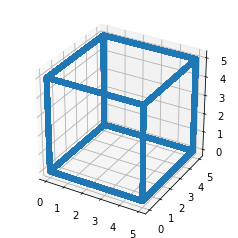



 PCA cube 3d


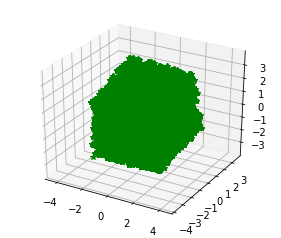

2D data shape:  (2, 160000)


 PCA cube 2d


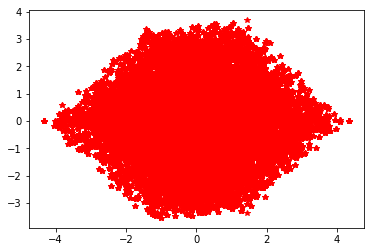

In [2]:
print("Just cube")

a = [0] * numb * 4
b = [d] * numb * 4
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
X2 = np.append(X,X)
X2 = np.append(X2,X)
X2 = np.append(X2,X)

Y2 = np.append(Y,Y)
Y2 = np.append(Y2,a)
Y2 = np.append(Y2,b)

Z2 = np.append(a,b)
Z2 = np.append(Z2, Y)
Z2 = np.append(Z2, Y)

ax.scatter(X2,Y2,Z2)
plt.show()


X2 = np.array(X2).T
Y2 = np.array(Y2).T
Z2 = np.array(Z2).T
matrix2 = np.concatenate((X2,Y2))
matrix2 = np.concatenate((matrix2,Z2))
matrix2 = matrix2.reshape(16*numb,3)


###
def princomp(A):
 # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-np.mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = np.linalg.eig(np.cov(M)) # attention:not always sorted
    score = np.dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

coeff, score, latent = princomp(matrix2)
#print("Coeff: \n", coeff)
#print("Score: \n", score)
#print("Latent: \n", latent)

print("\n\n PCA cube 3d")
# every eigenvector describe the direction of a principal component.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# new data
plt.plot(score[0,:],score[1,:],score[2,:],'*g')
plt.show()

# reduce
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(matrix2)

sklearn_transf = sklearn_transf.T
print("2D data shape: ",sklearn_transf.shape)
print("\n\n PCA cube 2d")
plt.plot(sklearn_transf[0,:],sklearn_transf[1,:],'*r')
plt.show()

 Zad 3.
Pobierz dawne dane (wymiaru więcej niż 5) z repozytorium UCI oraz wizualizuj je za pomocą PCA. 

In [3]:
data =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv", 
                    sep=",", header=None, dtype=int, skiprows = [0])
data = data.T
print("Data shape: ", data.shape)


Data shape:  (8, 440)


Data visualisation:
Data shape:  (3, 440)


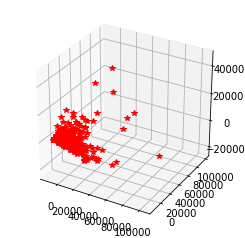

In [4]:
print("Data visualisation:")
# reduce
sklearn_pca = sklearnPCA(n_components=3)
sklearn_transf = sklearn_pca.fit_transform(data.T)
sklearn_transf = sklearn_transf.T
print("Data shape: ", sklearn_transf.shape)

#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.set_aspect("equal")
#plt.plot(data.T[0],data.T[1],data.T[2],'*b')
#plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
plt.plot(sklearn_transf[0,:],sklearn_transf[1,:],sklearn_transf[2,:],'*r')
plt.show()

 Zad 4.
Ściągnij bazę twarzy handwritten digits wykonaj algorytm PCA (5 wymiarów).

	from sklearn.datasets import load_digits
	digits = load_digits()
	print digits.keys()
	

Wykonaj grupowanie danych metodą k-means (k=9) na danych pełnego wymiaru oraz danych po algorytmie PCA wymiarach. Porównaj wyniki za pomocą miary Jaccard index. 

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


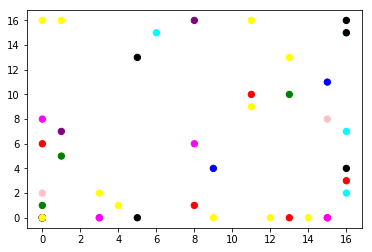

(1797, 64)
(1797, 60)


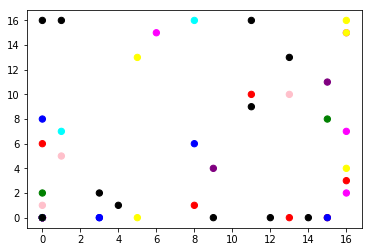

Jaccard =  0.326655537006


In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
x = pd.DataFrame(digits.data)

model = KMeans(n_clusters=9)
model.fit(x)

colormap = np.array(['red', 'green', 'blue', 'yellow', 'black', 'purple', 'pink', 'cyan', 'magenta'])
plt.scatter(x.T[2], x.T[4],c=colormap[model.labels_], s=40)
plt.show()

print(x.shape)
# reduce
sklearn_pca2 = sklearnPCA(n_components=60)
sklearn_transf2 = sklearn_pca2.fit_transform(x)
#sklearn_transf2 = sklearn_transf2.T
print(sklearn_transf2.shape)
model2 = KMeans(n_clusters=9)
model2.fit(sklearn_transf2)
#colormap = np.array(['red', 'green', 'blue', 'yellow', 'black', 'purple', 'pink', 'cyan', 'magenta'])
#plt.scatter(sklearn_transf2.T[2], sklearn_transf2.T[4],c=colormap[model2.labels_], s=40)
#plt.show()

sklearn_transf3 = sklearn_pca2.inverse_transform(sklearn_transf2)

model3 = KMeans(n_clusters=9)
model3.fit(sklearn_transf3)
colormap = np.array(['red', 'green', 'blue', 'yellow', 'black', 'purple', 'pink', 'cyan', 'magenta'])

plt.scatter(sklearn_transf3[2,:],sklearn_transf3[4,:],c=colormap[model3.labels_], s=40)
plt.show()

score = jaccard_similarity_score(model2.labels_, model3.labels_) #warning, random order of targets!
print("Jaccard = ",score)

 Zad 5.
Zaimplementuj PCA samodzielnie (link).
W tym zadaniu nie używaj wbudowanej funkcji PCA. MOżesz używać funkcji, które występują w poszczególnych krokach PCA.
Sprawdź działanie algorytmu na danych 3d redukując wymiarowość do 2d.

    Computing the d-dimensional mean vector
    Computing the Covariance Matrix
    Computing eigenvectors and corresponding eigenvalues
    Visualizing the eigenvectors
    Sorting the eigenvectors by decreasing eigenvalues
    Choosing k eigenvectors with the largest eigenvalues
    Transforming the samples onto the new subspace

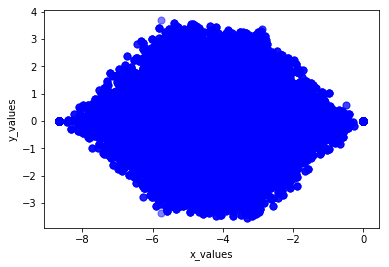

In [9]:
all_samples = matrix2.T
#print(all_samples.shape)
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

#print('Mean Vector:\n', mean_vector)
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
#print('Scatter Matrix:\n', scatter_matrix)
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
#print('Covariance Matrix:\n', cov_mat)
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    #print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    #print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    #print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    #print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    #print(40 * '-')
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
for ev in eig_vec_sc:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
#print('Matrix W:\n', matrix_w)
transformed = matrix_w.T.dot(all_samples)

assert transformed.shape == (2,16*numb), "The matrix is wrong."

plt.plot(transformed[0], -transformed[1], 'o', markersize=7, color='blue', alpha=0.5)
plt.xlabel('x_values')
plt.ylabel('y_values')

plt.show()